In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [26]:
# Loading the wine dataset
wine = fetch_ucirepo(id=109) 

In [27]:
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets

In [28]:
# Convert y to a NumPy array before using train_test_split
y_np = y.values.ravel() if isinstance(y, pd.DataFrame) else y.ravel()

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_np, test_size=0.2, random_state=42)

In [30]:
# Scale the features if necessary
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Evaluate the model
score = model.score(X_test_scaled, y_test)
score = round(score, 4)
score

1.0

In [33]:
# Get feature importances
feature_importances = model.feature_importances_
feature_importances = pd.Series(feature_importances, index=wine.feature_names)
feature_importances.sort_values(ascending=False, inplace=True)

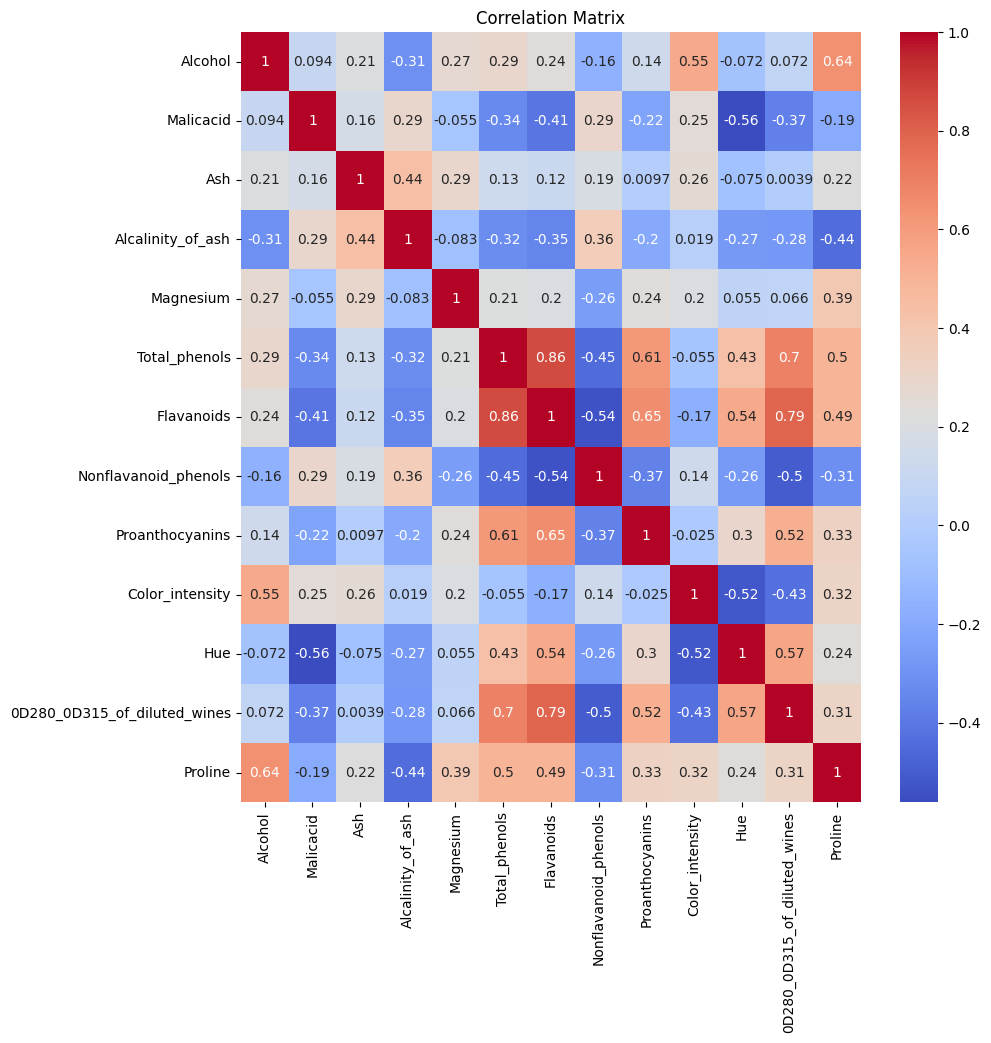

In [37]:
# Visualization 1: Correlation Matrix
if wine and wine.data:
    corr = wine.data.features.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Error: Unable to retrieve or process the dataset.")

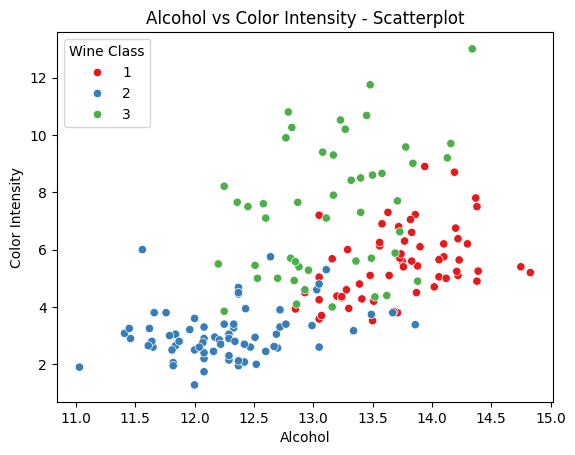

In [44]:
# Visualization 2: alcohol vs. color_intensity
sns.scatterplot(x="Alcohol", y="Color_intensity", hue=y_np, data=wine.data.features, palette="Set1")
plt.title('Alcohol vs Color Intensity - Scatterplot')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.legend(title='Wine Class')
plt.show()

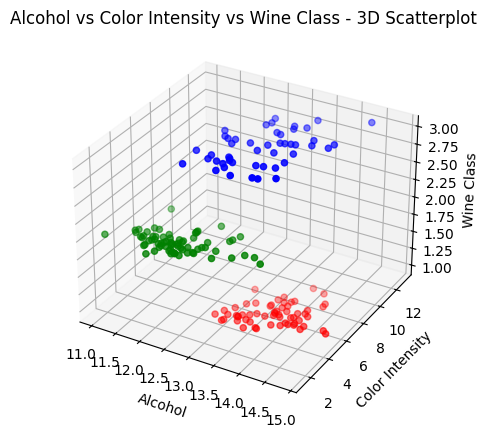

In [46]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
colors = {1: 'r', 2: 'g', 3: 'b'}  # Assuming y_np represents class labels
ax.scatter(wine.data.features["Alcohol"], wine.data.features["Color_intensity"], y_np,
            c=[colors[x] for x in y_np])
ax.set_xlabel('Alcohol')
ax.set_ylabel('Color Intensity')
ax.set_zlabel('Wine Class')
plt.title('Alcohol vs Color Intensity vs Wine Class - 3D Scatterplot')
plt.show()

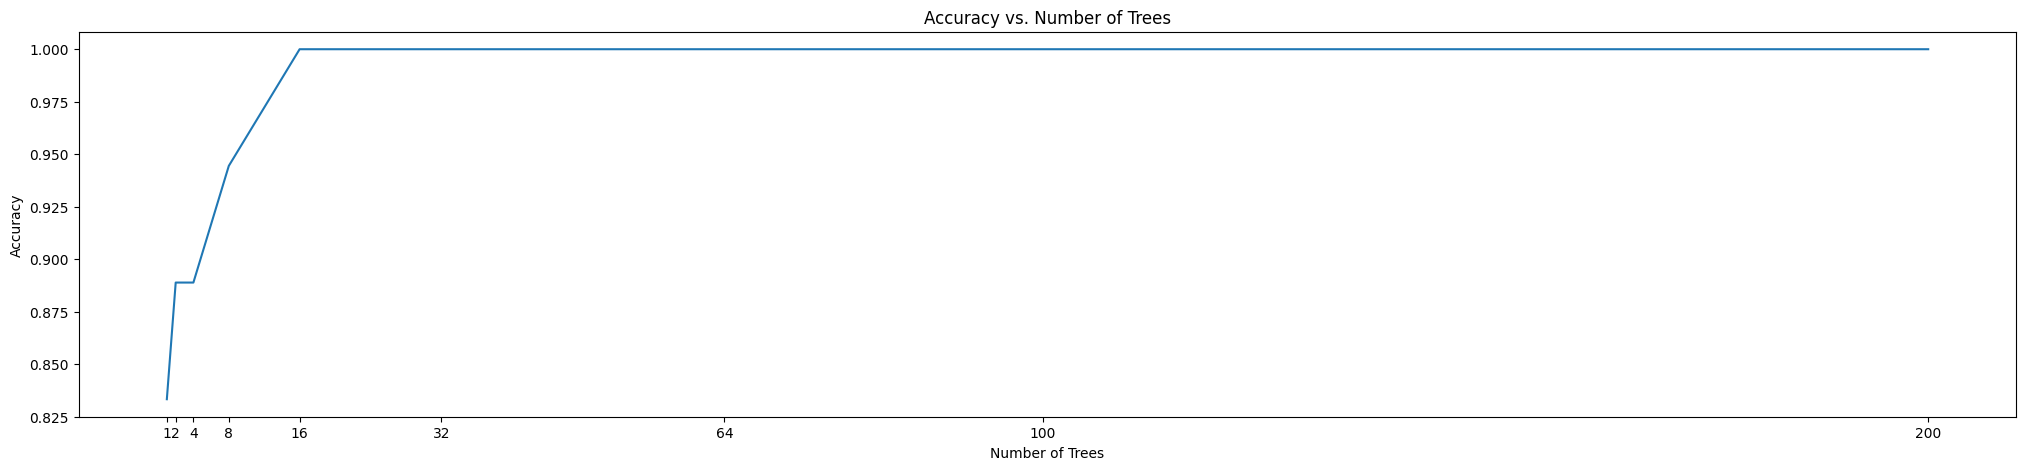

In [49]:
# Accuracy vs. Number of Trees
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
scores = []
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train_scaled, y_train)
    scores.append(model.score(X_test_scaled, y_test))

plt.figure(figsize=(25, 5))
plt.title('Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(n_estimators)
plt.plot(n_estimators, scores)
plt.show()

In [54]:
# Model accracy
score = model.score(X_test_scaled, y_test)
score

1.0

In [55]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

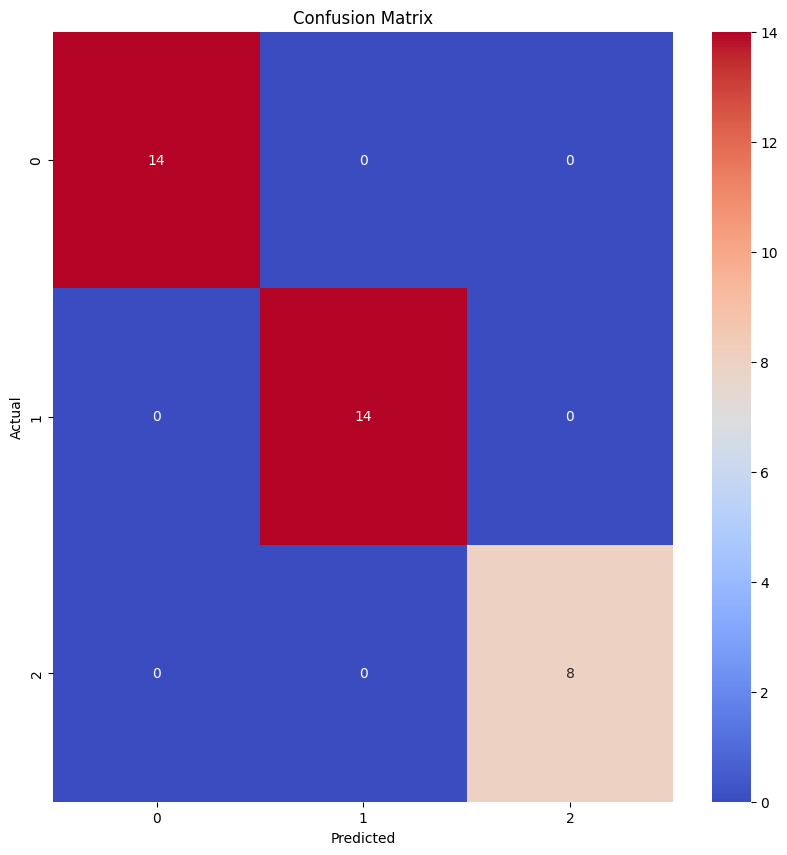

In [57]:
#visualization of confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap="coolwarm")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [58]:
#Precision, Recall, F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

